### HR Analytics

In [2]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import seaborn as sns
sns.set_style("whitegrid")
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
pa=pd.read_csv("D:/Sem_2/Predictive Analytics/Datasets/HR_Analytics.csv")
pa.head()

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


### Data Pre-Processing and Preparation

In [5]:
pa.shape

(12333, 17)

In [6]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate Ref                12333 non-null  int64  
 1   DOJ Extended                 12333 non-null  object 
 2   Duration to accept offer     9614 non-null   float64
 3   Notice period                12333 non-null  int64  
 4   Offered band                 12333 non-null  object 
 5   Pecent hike expected in CTC  11586 non-null  float64
 6   Percent hike offered in CTC  11737 non-null  float64
 7   Percent difference CTC       11482 non-null  float64
 8   Joining Bonus                12333 non-null  object 
 9   Candidate relocate actual    12333 non-null  object 
 10  Gender                       12333 non-null  object 
 11  Candidate Source             12333 non-null  object 
 12  Rex in Yrs                   12333 non-null  int64  
 13  LOB             

In [7]:
pa_numeric = pa.select_dtypes(include=[np.number])
numeric_cols = pa_numeric.columns.values
print(numeric_cols)

['Candidate Ref' 'Duration to accept offer' 'Notice period'
 'Pecent hike expected in CTC' 'Percent hike offered in CTC'
 'Percent difference CTC' 'Rex in Yrs' 'Age']


In [8]:
pa_non_numeric = pa.select_dtypes(exclude=[np.number])
non_numeric_cols = pa_non_numeric.columns.values
print(non_numeric_cols)

['DOJ Extended' 'Offered band' 'Joining Bonus' 'Candidate relocate actual'
 'Gender' 'Candidate Source' 'LOB' 'Location' 'Status']


In [9]:
# count the number of nan values in each column
print(pa.isnull().sum())

Candidate Ref                     0
DOJ Extended                      0
Duration to accept offer       2719
Notice period                     0
Offered band                      0
Pecent hike expected in CTC     747
Percent hike offered in CTC     596
Percent difference CTC          851
Joining Bonus                     0
Candidate relocate actual         0
Gender                            0
Candidate Source                  0
Rex in Yrs                        0
LOB                               0
Location                          0
Age                               0
Status                            0
dtype: int64


In [10]:
# using median
pa['Duration to accept offer'].fillna(pa['Duration to accept offer'].median(), inplace=True)
pa['Percent difference CTC'].fillna(pa['Percent difference CTC'].median(), inplace=True)

In [11]:
#using mean
pa['Pecent hike expected in CTC'].fillna(int(pa['Pecent hike expected in CTC'].mean()), inplace=True)
pa['Percent hike offered in CTC'].fillna(int(pa['Percent hike offered in CTC'].mean()), inplace=True)

In [12]:
# count the number of nan values in each column
print(pa.isnull().sum())

Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64


In [13]:
import category_encoders as ce
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Status'],
                           mapping=[{'col':'Status',
                                     'mapping':{'Joined':0,'Not Joined':1}}])
#Original data
pa

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,3828260,No,9.0,0,E0,47.54,42.86,-3.18,No,No,Male,Direct,0,BSERV,Chennai,34,Joined
12329,3830270,No,9.0,0,E0,47.54,42.86,-3.18,No,No,Male,Direct,0,BSERV,Chennai,34,Joined
12330,3834159,No,0.0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,Joined
12331,3835433,No,0.0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined


In [14]:
pa = encoder.fit_transform(pa)
pa.head(10)

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,0
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,0
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,0
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,0
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,0
5,2117167,Yes,17.0,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,INFRA,Noida,34,0
6,2119124,Yes,37.0,30,E2,31.58,31.58,0.00,No,No,Male,Employee Referral,7,INFRA,Noida,32,0
7,2121918,No,9.0,45,E2,40.00,208.64,120.45,No,No,Male,Employee Referral,4,INFRA,Noida,34,1
8,2127572,Yes,16.0,0,E1,-20.00,-20.00,0.00,No,No,Female,Direct,8,Healthcare,Noida,34,0
9,2137866,No,9.0,30,E1,1.00,-51.37,-55.71,No,No,Male,Direct,4,ERS,Noida,34,1


In [15]:
#Rearranging Columns names
pa = pa[['Duration to accept offer', 'Notice period', 'Pecent hike expected in CTC',
         'Percent hike offered in CTC', 'Percent difference CTC', 'DOJ Extended', 'Joining Bonus', 'Offered band', 'Candidate relocate actual', 'Age',
         'Gender','Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Status']]

In [16]:
pa.head(5)

,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,DOJ Extended,Joining Bonus,Offered band,Candidate relocate actual,Age,Gender,Candidate Source,Rex in Yrs,LOB,Location,Status
0,14.0,30,-20.79,13.16,42.86,Yes,No,E2,No,34,Female,Agency,7,ERS,Noida,0
1,18.0,30,50.00,320.00,180.00,No,No,E2,No,34,Male,Employee Referral,8,INFRA,Chennai,0
2,3.0,45,42.84,42.84,0.00,No,No,E2,No,27,Male,Agency,4,INFRA,Noida,0
3,26.0,30,42.84,42.84,0.00,No,No,E2,No,34,Male,Employee Referral,4,INFRA,Noida,0
4,1.0,120,42.59,42.59,0.00,Yes,No,E2,Yes,34,Male,Employee Referral,6,INFRA,Noida,0


In [17]:
print(pa.groupby('Status').size())

Status
0    8725
1    3608
dtype: int64


## Initial analysis of data using EDA

Text(0.5, 1.0, 'RENEGE RATE AS PER THE LOCATION')

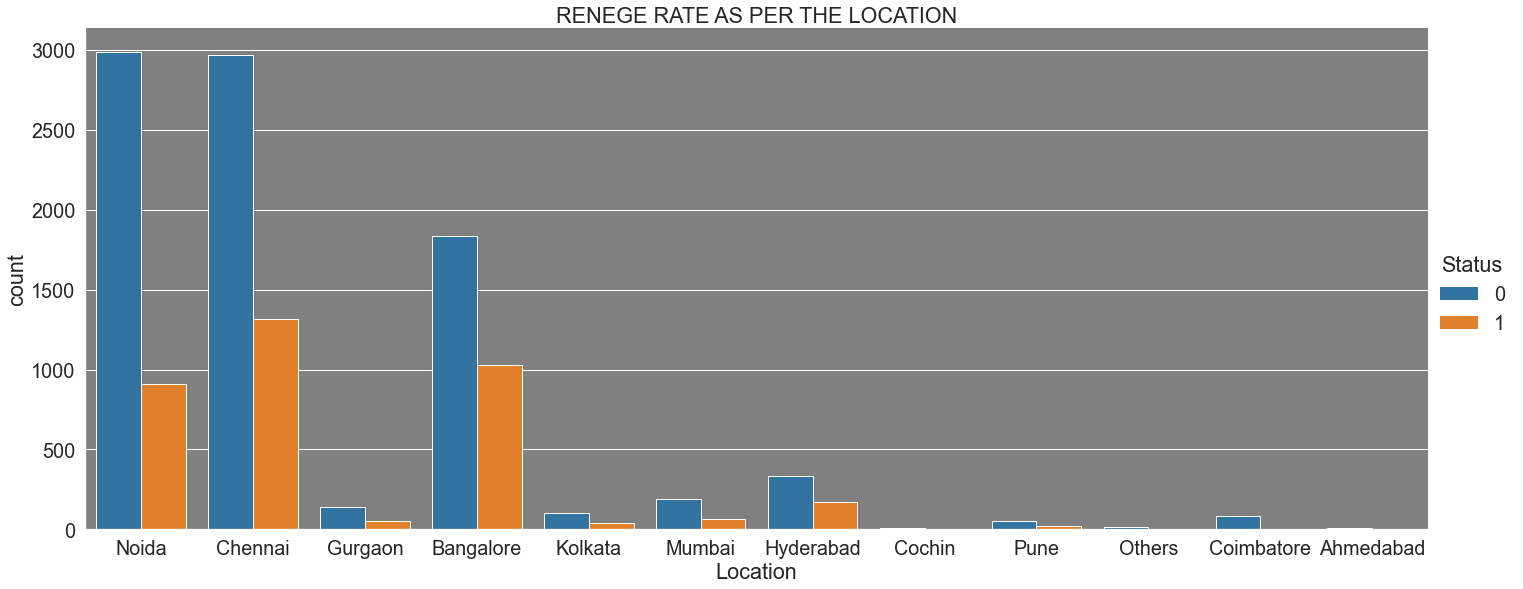

In [18]:
#Renege rate as per the locations where a role is offered:
sns.set_style('darkgrid', {'axes.facecolor':'0.5'})
sns.set_context('notebook', font_scale = 1.8, rc = {'lines.linewidth':2.5})
sns.catplot(x = 'Location', hue = 'Status', data = pa, 
            kind = 'count', height = 8, aspect = 2.5)
plt.title('RENEGE RATE AS PER THE LOCATION')

> Inferrance:

- From the above grouped bar graph we can infer the number of applicants who was offered any
  job role by the the hiring group actually joined their respective roles after they have
  accepted the offer and also among all the location which one have higher renege rate compare
  to the actual joining rate.
- Here, Noida have the least renege rate and higher chances of the offer being accepted and the
  candidate joining the role offered to them. Also, banglore have the highest renege rate than
  the joining rate. As in the case of banglore location we can see that applicant actually joining
  the role is vey low an the rate of applicant not joining after the role is being offered to
  them is very high.

Text(0.5, 1.0, 'AGE DISTRIBUTION OF ALL THE APPLICANTS')

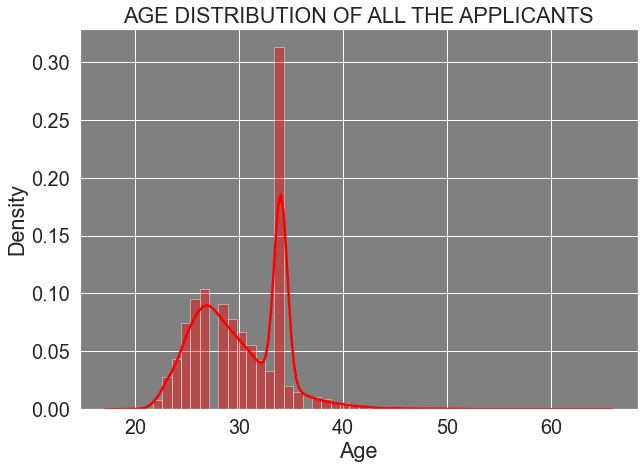

In [19]:
#Looking at the distribution of the age range of the applicants
plt.figure(figsize = (10,7))
sns.distplot(pa['Age'],color = 'red')
plt.title('AGE DISTRIBUTION OF ALL THE APPLICANTS')

> Inferrance:

- From this distribution plot we can infer that majority of applicants have age range between
  22 to 35. Also highest number of applicants are of age 32-35 who are actively looking for 
  change in their current job and applying very aggresively for different roles and open 
  open positions.

Text(0.5, 1.0, 'COMPARISION OF HIKE EXPECTED AND OFFERED TO THE CANDIDATE')

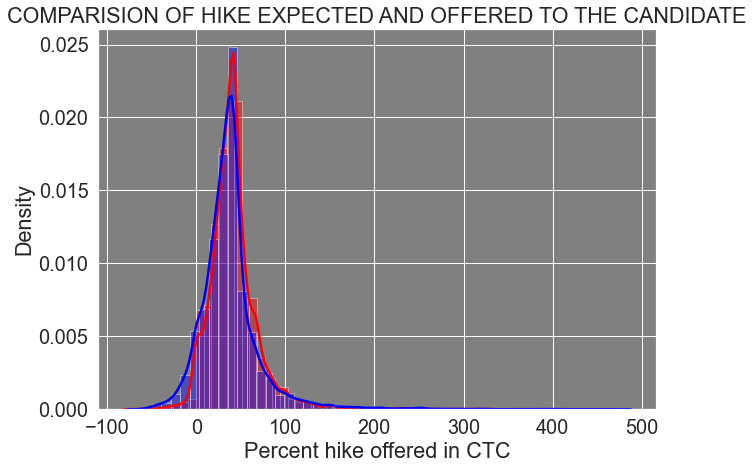

In [20]:
#Comparing the hike expected by the candidate and hike that is actually offered
plt.figure(figsize = (10,7))
sns.distplot(pa['Pecent hike expected in CTC'],color = 'red')
sns.distplot(pa['Percent hike offered in CTC'],color = 'blue')
plt.title('COMPARISION OF HIKE EXPECTED AND OFFERED TO THE CANDIDATE')

> Inferrance:

- Hike is a majorly important for a person before taking the decision for changing
  their current job. Thus, here in this comparision plot we can see that the distribution
  of the hike expected and hike offered is normally distributed and also somewhat
  overlaping on eachother.
- From this overlap we can infer that majority of the applicants are offered the hike
  that was expected. But on the other hand there is also some part of the distribution
  plot which is not overlaping which indicated that certain amount of applicants were
  whether offerd more than their expectations and some were offered less than their
  expectations. This could be a major reason for higher renege rate for the role an
  applicant is offered.

Text(0.5, 1.0, 'TIME TAKEN BY APPLICANTS TO ACCEPT THE OFFER')

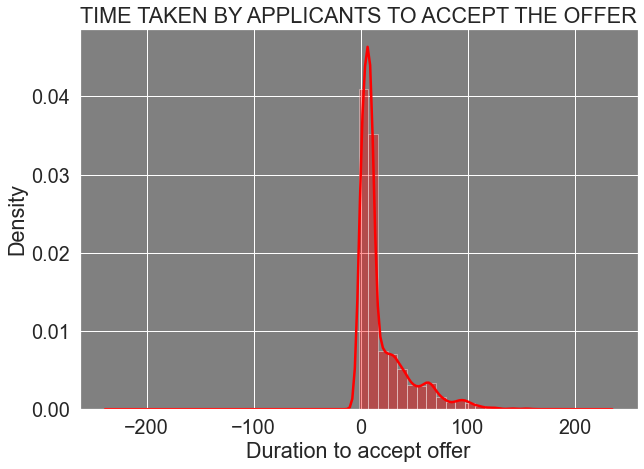

In [21]:
#Analyzing the impoact of time taken by applicant to accept the job offer
plt.figure(figsize = (10,7))
sns.distplot(pa['Duration to accept offer'],color = 'red')
plt.title('TIME TAKEN BY APPLICANTS TO ACCEPT THE OFFER')

> Inferrance:

- From this plot we can infer that on an average how long an applicant takes to accept the offer.
  we can see here that higher the time taken by an applicant to accept the offer higher the 
  chances are that he/she will not join even after acepting the offer that have been provided by
  the scalene works.
- Here, we can see that the highest time taken by any applicant is around 120 days after the offer
  has been made to the candidate and in this case there are high chances that they will not join the
  organizatoin even after accepting the offer.

In [22]:
#defining the x and y
X=pa.drop(columns=['Status'])
y=pa['Status']

In [23]:
from sklearn.preprocessing import OneHotEncoder

#One Hot Coding:
X = pd.get_dummies(X, columns=['DOJ Extended', 'Joining Bonus', 'Candidate relocate actual', 'Offered band', 'Gender', 'LOB', 'Candidate Source', 'Candidate Source', 'Location'])

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Duration to accept offer            12333 non-null  float64
 1   Notice period                       12333 non-null  int64  
 2   Pecent hike expected in CTC         12333 non-null  float64
 3   Percent hike offered in CTC         12333 non-null  float64
 4   Percent difference CTC              12333 non-null  float64
 5   Age                                 12333 non-null  int64  
 6   Rex in Yrs                          12333 non-null  int64  
 7   DOJ Extended_No                     12333 non-null  uint8  
 8   DOJ Extended_Yes                    12333 non-null  uint8  
 9   Joining Bonus_No                    12333 non-null  uint8  
 10  Joining Bonus_Yes                   12333 non-null  uint8  
 11  Candidate relocate actual_No        12333

In [26]:
from sklearn.model_selection import train_test_split
# split into 80:20 ratio; 20% being the test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
# describes info about train and test set
print("Shape of X_train dataset:", X_train.shape)
print("Shape of y_train dataset:", y_train.shape)
print("Shape of X_test dataset:", X_test.shape)
print("Shape of y_test dataset:", y_test.shape)

Shape of X_train dataset: (9866, 52)
Shape of y_train dataset: (9866,)
Shape of X_test dataset: (2467, 52)
Shape of y_test dataset: (2467,)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [29]:
# logistic regression object
lr = LogisticRegression()
# train the model on train set
lr.fit(X_train, y_train.ravel())
predictions = lr.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1726
           1       0.64      0.39      0.48       741

    accuracy                           0.75      2467
   macro avg       0.71      0.65      0.66      2467
weighted avg       0.73      0.75      0.73      2467



In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
sm = SMOTE()
X_train = np.array(X_train)
X, y = sm.fit_resample(X_train, y_train.ravel())

In [32]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, counts of label '1': 2867
Before OverSampling, counts of label '0': 6999 

After OverSampling, the shape of train_X: (13998, 52)
After OverSampling, the shape of train_y: (13998,) 

After OverSampling, counts of label '1': 6999
After OverSampling, counts of label '0': 6999


In [33]:
lr1 = LogisticRegression()
lr1.fit(X, y)
predictions = lr1.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74      1726
           1       0.48      0.75      0.59       741

    accuracy                           0.68      2467
   macro avg       0.67      0.70      0.66      2467
weighted avg       0.74      0.68      0.69      2467



In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
def plot_roc(model, X_test, y_test):
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize = (7,7))
    plt.plot(fpr, tpr, label='{} (area = %0.2f)'.format(model) % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show();

## Implementing Logistic regression model

In [35]:
#lr as Logistic class
lr = LogisticRegression()
#Fit model
lr.fit(X, y)
pred=lr.predict(X_test)
print(accuracy_score(y_test, pred))

0.681799756789623


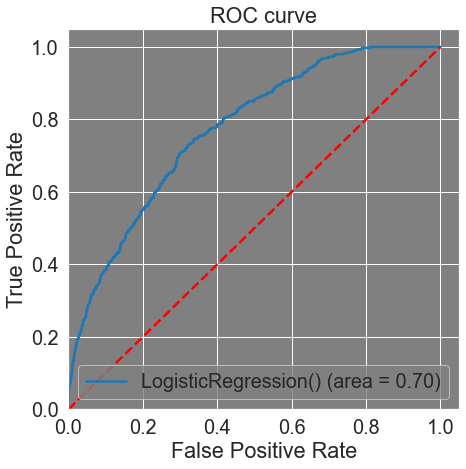

In [36]:
plot_roc(lr,X_test, y_test )

### Testing the significance of the variables on renege

In [58]:
#Checking for P-value for signinificance using f-test
def f_test(y):
    x=pa['Status']
    regressor_OLS = sm.OLS(y, x).fit()
    print("correlation value is {} and P-value for significance is {}".format(y.corr(x), regressor_OLS.f_pvalue))

In [59]:
f_test (pa['Duration to accept offer'])

correlation value is -0.01998383304824795 and P-value for significance is 3.347844064239472e-288


In [60]:
f_test (pa['Pecent hike expected in CTC'])

correlation value is -0.005613077665905503 and P-value for significance is 0.0


In [61]:
f_test (pa['Percent hike offered in CTC'])

correlation value is -0.07319885982512801 and P-value for significance is 0.0


In [62]:
f_test (pa['Percent difference CTC'])

correlation value is -0.07719770966147452 and P-value for significance is 7.290427566121309e-40


In [63]:
f_test (pa['Age'])

correlation value is -0.052255764853915386 and P-value for significance is 0.0


In [64]:
f_test (pa['Rex in Yrs'])

correlation value is 0.09367481573350073 and P-value for significance is 0.0


> Inferrance:

- Above we have performed f-test of statistical significance which indicates on what scale
  a particular affects on the predicted variable. Looking at the p values that we have 
  most of the variables that we have p values somewhere near to 0 and accrding to the 
  statistics rules an ideal P-value for a variable to hold significanse should be less then
  0.05 (<0.05).
- Thus looking at the P-value that we have we can say that most of the variables holds 
  valid statistical significance for the target variable which is used for calculating the
  renege rate.
 

### Implementing Decision tree classification model

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [38]:
dt=DecisionTreeClassifier()
dt.fit(X, y)
pred=dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7454398054316984


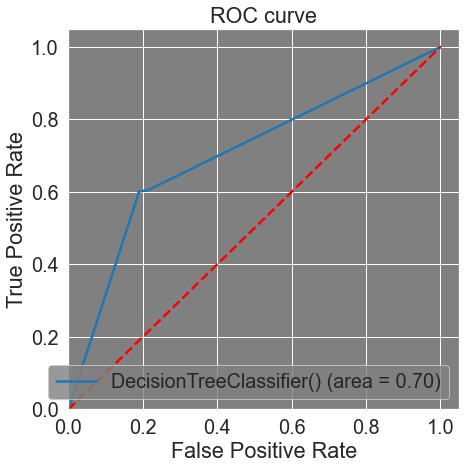

In [39]:
plot_roc(dt,X_test, y_test )

### Implementing KNN model

In [65]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train, y_train)
pred111=model.predict(X_test)
print(accuracy_score(y_test, pred111))

0.737332792865829


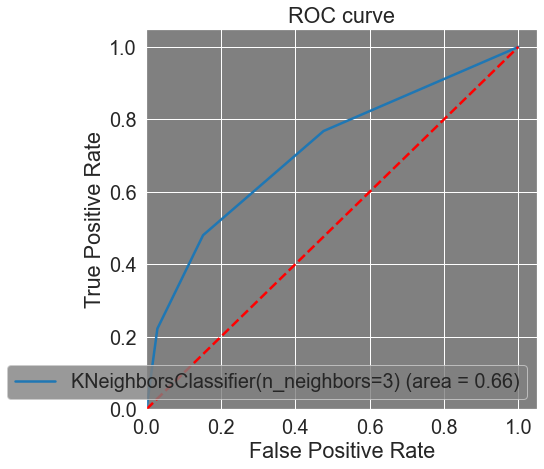

In [66]:
plot_roc(model,X_test, y_test )

### Implementing Random forest classification model

In [40]:
rfc=RandomForestClassifier(n_estimators=120)
rfc.fit(X, y)
pred=rfc.predict(X_test)
print(accuracy_score(y_test, pred))

0.8038102959059586


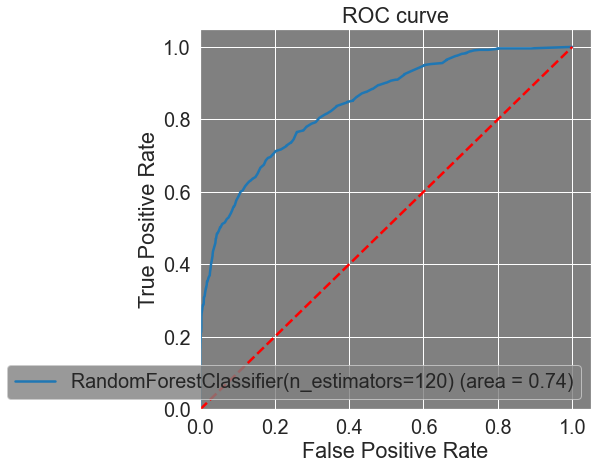

In [41]:
plot_roc(rfc,X_test, y_test )

### Model Selection

- For predicting the renege rate or we can say whether the applicant will actually
  join after accepting the offer we have developed in total 3 models which are
  Logistic regression, Decision tree, and random forest. 
- Among this 3 models we have also plotted the ROC curve for all the model which
  shows the "True Positive Rate" or sensitivity of the predictive model and compare
  it with the "False Positive Rate". Comparing ROC curve of all the three models 
  the curvefor the Random Forest looks more closer the th 100% sensitivity of the 
  model and also random forest holds higher accuracy above 80% thus with the preferrance
  one should prefer this three models in following sequence:
- Random forest (Accuracy = 80.38%)
- Decision tree (Accuracy = 74.54%)
- KNN (Accuracy = 73.73%)
- Logistic regression (Accuracy = 68.17%)